In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# [Image Gradients](https://docs.opencv.org/3.4/d5/d0f/tutorial_py_gradients.html)

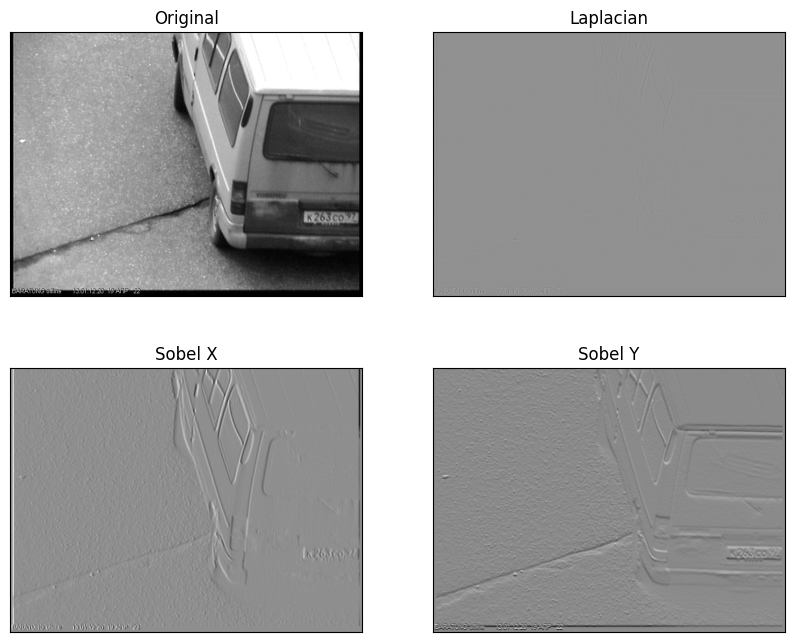

In [3]:
img = cv.imread('../img/01-541.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)

plt.figure(figsize=(10,8))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

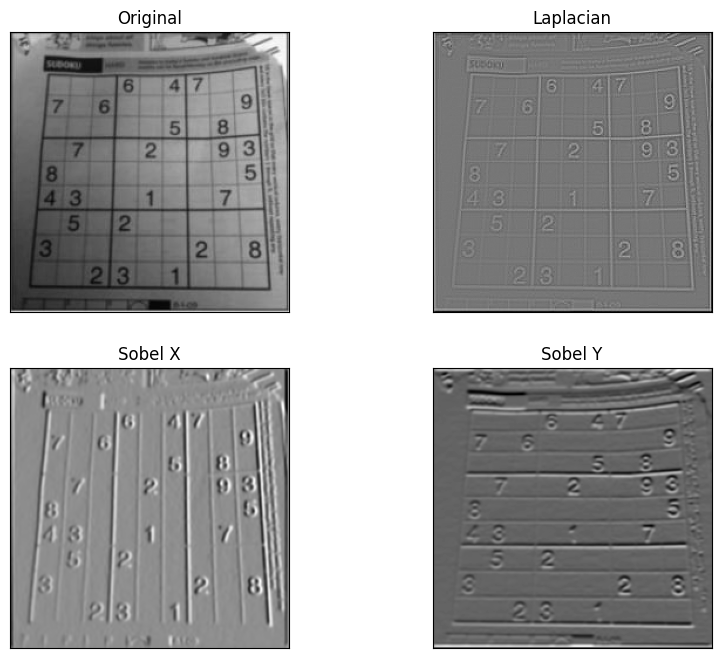

In [5]:
img = cv.imread('../img/sudoku.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)

plt.figure(figsize=(10,8))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

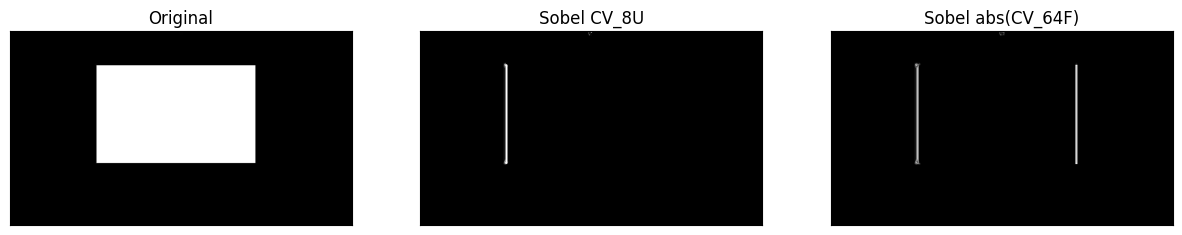

In [7]:
img = cv.imread('../img/whsquare.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

# Output dtype = cv.CV_8U
sobelx8u = cv.Sobel(img,cv.CV_8U,1,0,ksize=5)
# Output dtype = cv.CV_64F. Then take its absolute and convert to cv.CV_8U
sobelx64f = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.figure(figsize=(15,10))
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()

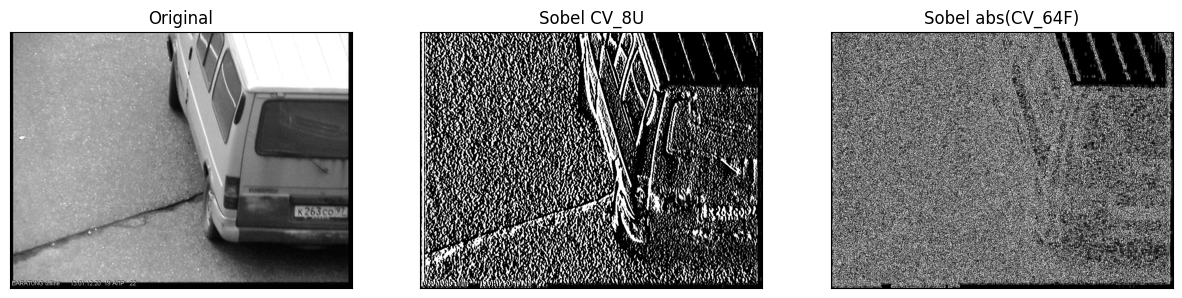

In [8]:
img = cv.imread('../img/01-541.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

# Output dtype = cv.CV_8U
sobelx8u = cv.Sobel(img,cv.CV_8U,1,0,ksize=5)
# Output dtype = cv.CV_64F. Then take its absolute and convert to cv.CV_8U
sobelx64f = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.figure(figsize=(15,10))
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()

# [Canny Edge Detection](https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html)

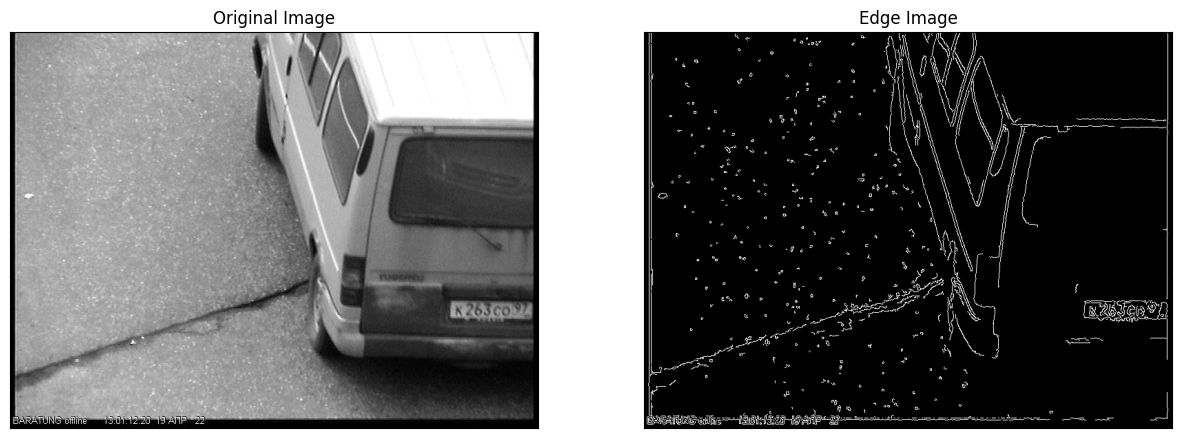

In [9]:
img = cv.imread('../img/01-541.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

edges = cv.Canny(img,100,200)

plt.figure(figsize=(15, 8))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

# [Contour Features](https://docs.opencv.org/3.4/dd/d49/tutorial_py_contour_features.html)

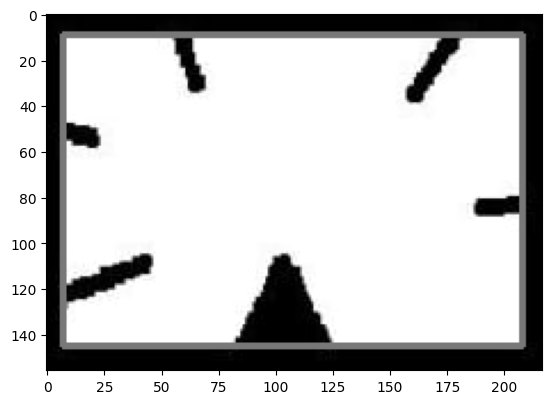

In [11]:
img = cv.imread('../img/sth2.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

ret, thresh = cv.threshold(img, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv.moments(cnt)

cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])
area = cv.contourArea(cnt)
perimeter = cv.arcLength(cnt, True)

hull = cv.convexHull(cnt)
cv.drawContours(img, [hull], 0, (120, 120, 120), 2)
plt.imshow(img, cmap='gray')

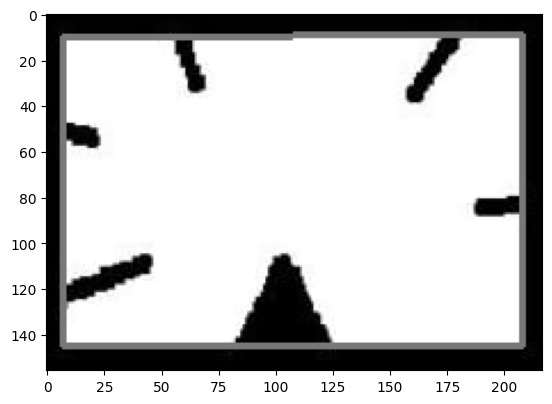

In [39]:
img = cv.imread('../img/sth2.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

ret, thresh = cv.threshold(img, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv.moments(cnt)

cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])
area = cv.contourArea(cnt)
perimeter = cv.arcLength(cnt, True)

hull = cv.convexHull(cnt)

epsilon = 0.1 * cv.arcLength(cnt, True)
approx = cv.approxPolyDP(cnt, epsilon, True)
cv.drawContours(img, [approx], 0, (120, 120, 120), 2)

plt.imshow(img, cmap='gray')

In [32]:
img = cv.imread('../img/litning.png', cv.COLOR_BGR2RGB)
assert img is not None, "file could not be read, check with os.path.exists()"

img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret,thresh = cv.threshold(img,127,255,0)
contours,hierarchy = cv.findContours(thresh, 1, 2)
cnt = contours[0]

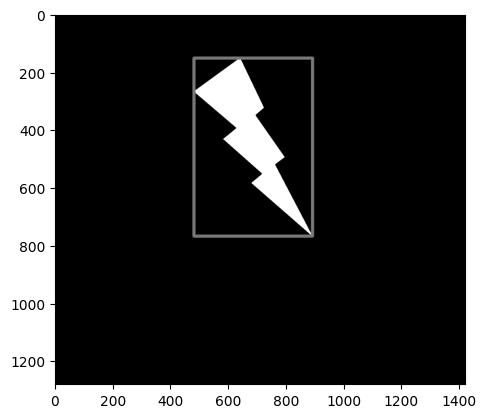

In [33]:
x,y,w,h = cv.boundingRect(cnt)
cv.rectangle(img,(x,y),(x+w,y+h),(120,120, 120),10)
plt.imshow(img, cmap='gray')

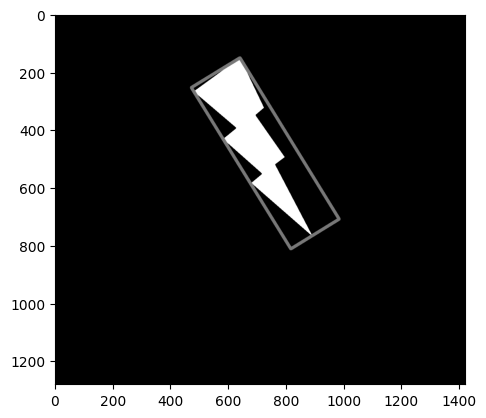

In [34]:
img = cv.imread('../img/litning.png', cv.COLOR_BGR2RGB)
rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.intp(box)
cv.drawContours(img,[box],0,(120,120,120),10)
plt.imshow(img, cmap='gray')

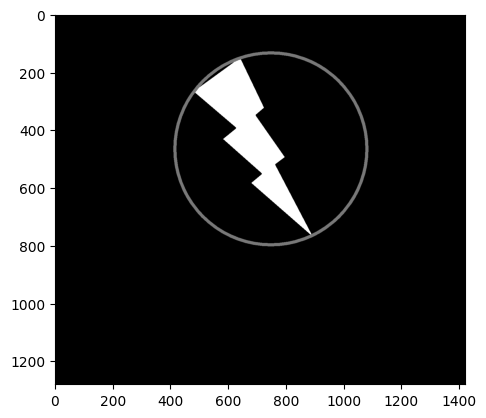

In [35]:

img = cv.imread('../img/litning.png', cv.IMREAD_GRAYSCALE)
(x,y),radius = cv.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
cv.circle(img,center,radius,(120,120,120),10)
plt.imshow(img, cmap='gray')

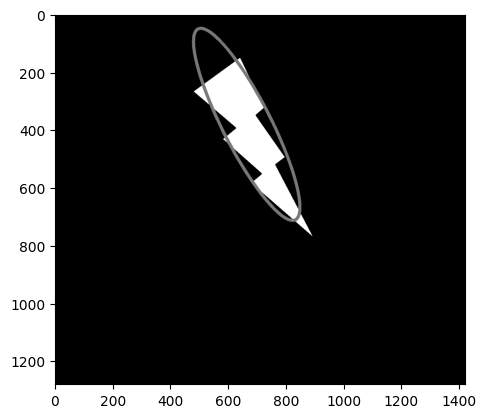

In [37]:
img = cv.imread('../img/litning.png', cv.IMREAD_GRAYSCALE)
ellipse = cv.fitEllipse(cnt)
cv.ellipse(img,ellipse,(120,120,120),10)
plt.imshow(img, cmap='gray')

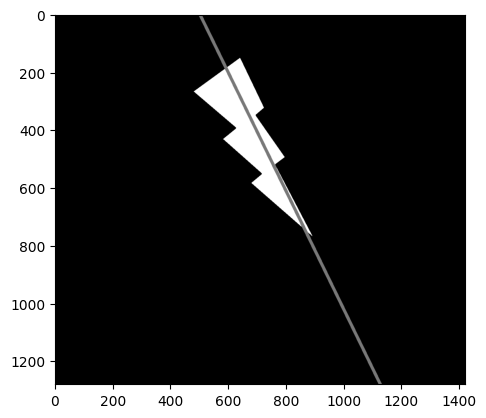

In [38]:
img = cv.imread('../img/litning.png', cv.IMREAD_GRAYSCALE)
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv.fitLine(cnt, cv.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
cv.line(img,(cols-1,righty),(0,lefty),(120,120,120),10)

plt.imshow(img, cmap='gray')